In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

file_path = r'F:\Statistics for Data Analysis\Statistics+for+Data+Analysis_MY\SQL\Statistics for Data Analysis.xlsx'
sheet_name = 'Numerical Distributions'

df = pd.read_excel(file_path, sheet_name=sheet_name)

column = 'Annual Salary (Thousands of USD)'

df['RangeStart'] = np.floor((df[column] - 10) / 20) * 20 + 10

grouped = df.groupby('RangeStart').size().reset_index(name='Frequency')

grouped['SalaryRange'] = grouped['RangeStart'].astype(int).astype(str) + '–' + (grouped['RangeStart'] + 20).astype(int).astype(str)

filtered = grouped[(grouped['RangeStart'] >= 70) & (grouped['RangeStart'] <= 330)].copy()

filtered['CumulativeFreq'] = filtered['Frequency'].cumsum()
filtered['TotalFreq'] = filtered['Frequency'].sum()
filtered['Cumulative Relative Frequency, %'] = (filtered['CumulativeFreq'] / filtered['TotalFreq'] * 100).round(2)

result = filtered[['SalaryRange', 'Frequency', 'Cumulative Relative Frequency, %']].reset_index(drop=True)

result


,SalaryRange,Frequency,"Cumulative Relative Frequency, %"
0,70–90,9,16.98
1,90–110,22,58.49
2,110–130,11,79.25
3,130–150,4,86.79
4,150–170,3,92.45
5,170–190,1,94.34
6,190–210,1,96.23
7,250–270,1,98.11
8,330–350,1,100.00


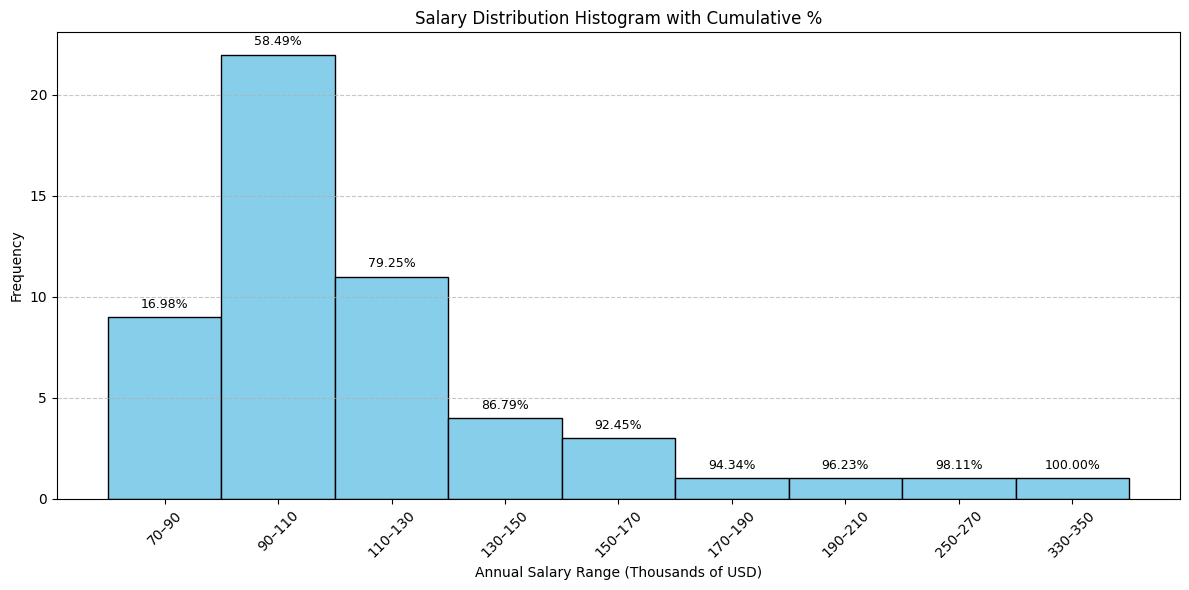

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.bar(
    filtered['SalaryRange'],
    filtered['Frequency'],
    color='skyblue',
    edgecolor='black',
    width=1.0
)

for bar, label in zip(bars, filtered['Cumulative Relative Frequency, %']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.3, 
        f'{label:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )


plt.xlabel('Annual Salary Range (Thousands of USD)')
plt.ylabel('Frequency')
plt.title('Salary Distribution Histogram with Cumulative %')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

